# Importing libraries

In [350]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Sinh các sample $X_i$

In [ ]:
n_samples = 10000
u = np.array([0, 0, 0])
Z = np.identity(3)

np.random.seed(0) #Cố định samples
X = np.random.multivariate_normal(u, Z, n_samples)
X

array([[ 1.76405235,  0.40015721,  0.97873798],
       [ 2.2408932 ,  1.86755799, -0.97727788],
       [ 0.95008842, -0.15135721, -0.10321885],
       ...,
       [ 1.03930909,  0.11820404, -0.76262253],
       [ 0.6060834 , -0.40089775, -0.58545199],
       [-1.51127631,  0.97684383,  1.25550065]])

# Kiểm định giả thuyết $u_2 = 0$
### $T = x_2 = (0 1 0)^T\times X$
### $T$ ~ $N((0, 0, 0)^T\times u, (0, 1, 0)^T\times Z\times (0, 1, 0))$
### $(0, 0, 0)^T\times u = 0$
### $(0, 1, 0)^T\times Z\times (0, 1, 0) = 1$
### => $T$ ~ $N(0, 1)$
### z_score $= (T - 0) / 1 = T$

In [352]:
T = X[:, 1]
T

array([ 0.40015721,  1.86755799, -0.15135721, ...,  0.11820404,
       -0.40089775,  0.97684383])

In [353]:
p_values = 1 - stats.norm.cdf(T)
p_values

array([0.34452037, 0.03091185, 0.56015303, ..., 0.452953  , 0.6557523 ,
       0.16432324])

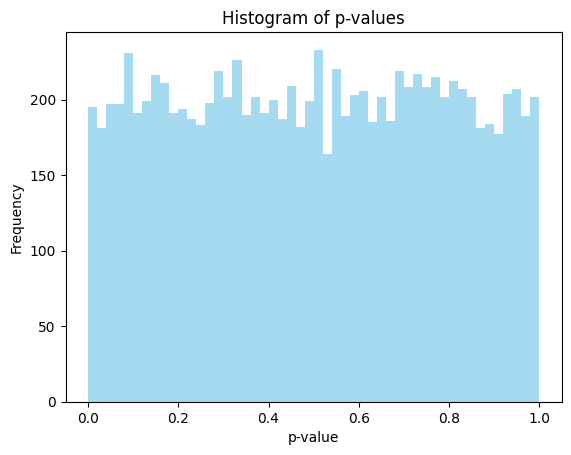

In [354]:
plt.hist(p_values, bins=50, alpha=0.75, color='skyblue')
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.title('Histogram of p-values')
plt.show()

In [369]:
ks_stat, ks_p_value = stats.kstest(rvs=p_values, cdf=stats.uniform.cdf, alternative='two-sided')
print(f"Kolmogorov-Smirnov test statistic: {ks_stat}")
print(f"p-value of the KS test: {ks_p_value}")

Kolmogorov-Smirnov test statistic: 0.006695201673415085
p-value of the KS test: 0.7585221353903892


# ks_p_value $> 0.05 =>$ p_values uniform